# Divide and Conquer Convex Hull Algorithm
## 13520075 - Samuel Christopher Swandi

In [6]:
# mencari titik terjauh dari line, dengan tipe "above" atau "below", yang berarti di atas garis atau di bawah garis
def searchForTheFurthestPointOf(type, line, points):
    
    # index titik terjauh pada points(2d array yang berisi kumpulan semua data)
    furthestPoint = 0

    # menghitung jarak terjauh dari titik ke garis
    furthestDistance = -9999999

    # untuk memenuhi parameter yang dibutuhkan oleh fungsi searchForArray
    lines = line

    # untuk mempermudah dalam pencarian x1,x2,y1, dan y2 
    # yang nantinya akan digunakan untuk menghitung jarak terjauh
    line = [points[line[0]], points[line[1]]]
    x1 = line[0][0]
    x2 = line[1][0]
    y1 = line[0][1]
    y2 = line[1][1]
    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2

    if type == "Above":
        # mencari seluruh titik yang berada di atas garis
        arrayAbove = searchForArray("Above", lines, points)

        # jika tidak ada titik yang berada di atas garis, maka return None
        if arrayAbove == []:
            return None

        # jika ada, maka mencari titik dengan jarak terjauh dari garis
        for i in arrayAbove:
            x = points[i][0]
            y = points[i][1]
            distance = abs(a*x + b*y + c) / math.sqrt(a**2 + b**2)
            if distance > furthestDistance:
                furthestDistance = distance
                furthestPoint = i

    if type == "Below":
        # mencari seluruh titik yang berada di bawah garis
        arrayBelow = searchForArray("Below", lines, points)

        # jika tidak ada titik yang berada di bawah garis, maka return None
        if arrayBelow == []:
            return None

        # jika ada, maka mencari titik dengan jarak terjauh dari garis
        for i in arrayBelow:
            x = points[i][0]
            y = points[i][1]
            distance = abs(a*x + b*y + c) / math.sqrt(a**2 + b**2)
            if distance > furthestDistance:
                furthestDistance = distance
                furthestPoint = i

    return furthestPoint


# mencari orientasi sebuah titik dengan garis
def orientation(p,q,r):
    # jika > 0, titik tersebut di atas garis
    # jika < 0, titik tersebut di bawah garis
    # jika = 0, titik berada pada garis
    # p dan q membentuk sebuah garis dan r merupakan titik yang akan di cek
    x1 = p[0]
    x2 = q[0]
    x3 = r[0]
    y1 = p[1]
    y2 = q[1]
    y3 = r[1]
    return math.ceil(x1*y2 + x3*y1 + x2*y3 - x3*y2 - x1*y3 - x2*y1)


# mencari seluruh titik yang berada di atas garis
# sesuai dengan tipe "above" atau "below"
def searchForArray(type, line, points):
    ans = []
    if type == "Above":
        for i in range(len(points)):
            # mengecek apakah titik tersebut merupakan garisnya
            if (i != line[0] and i != line[1]):
                # jika titik tersebut ada di atas garis, maka akan di append ke array anser
                if orientation(points[line[0]], points[line[1]], points[i]) > 0:
                    ans.append(i)

    if type == "Below":
        for i in range(len(points)):
            # mengecek apakah titik tersebut merupakan garisnya
            if (i != line[0] and i != line[1]):
                # jika titik tersebut ada di bawah garis, maka akan di append ke array anser
                if orientation(points[line[0]], points[line[1]], points[i]) <= 0:
                    ans.append(i)

    return ans


# rekursi convexhull
def dnqConvexHull(points, leftmost, rightmost, flag):
    # list of hull points
    hull = []

    # garis yang terbuat dari titik paling kiri dan kanan dari set of points yang diberikan
    line = [leftmost, rightmost]

    # untuk menentukan orientasi points yang ingin dipilih
    # apakah di atas atau di bawah garis
    # flag == True berrarti di atas garis

    if flag:
        # mencari titik terjauh di atas garis
        furthestPointAbove = searchForTheFurthestPointOf("Above", line, points)

        # jika tidak ada titik terjauh di atas garis, maka return titik paling kiri dan paling kanan pembentuk garis
        if furthestPointAbove == None:
            return [leftmost, rightmost]

        # return convexhull dari titik kiri pembuat garis dan titik terjauh dari garis dan
        # titik terjauh di atas garis dan titik kanan dari pembuat garis
        return dnqConvexHull(points, leftmost, furthestPointAbove, True) + dnqConvexHull(points, furthestPointAbove, rightmost, True)

    else :
        # mencari titik terjauh di atas garis
        furthestPointBelow = searchForTheFurthestPointOf("Below", line, points)

        # jika tidak ada titik terjauh di bawah garis, maka return titik paling kiri dan paling kanan pembentuk garis
        if furthestPointBelow == None:
            return [leftmost,rightmost]

        # return convexhull dari titik kiri pembuat garis dan titik terjauh dari garis dan
        # titik terjauh di atas garis dan titik kanan dari pembuat garis
        return dnqConvexHull(points, leftmost, furthestPointBelow, False) + dnqConvexHull(points, furthestPointBelow, rightmost, False)

    # menambahkan hasil kedalam hull untuk di return
    hull.append(leftmost)
    hull.append(rightmost)
    return hull


def myConvexHull(points):
    hull = []
    mn = [float('inf'),0]
    mx = [-999999,0]

    # mencari titik paling kiri dan kanan yang nantinya akan digunakan untuk menjadi garis
    # yang akan dimanfaatkan untuk titik2 yang berada di atas dan di bawah garis
    leftmost = 0
    rightmost = 0
    for i in range(len(buckets)):
        if buckets[i][0] < mn[0]:
            mn[0] = buckets[i][0]
            mn[1] = buckets[i][1]
            leftmost = i
        if buckets[i][0] > mx[0]:
            mx[0] = buckets[i][0]
            mx[1] = buckets[i][1]
            rightmost = i
    
    # mencari seluruh convexhull yang berada di atas garis yang dibuat oleh leftmost dan rightmost
    up = dnqConvexHull(points, leftmost, rightmost, True)

    # mencari seluruh convexhull yang berada di bawah garis yang dibuat oleh leftmost dan rightmost
    down = dnqConvexHull(points, leftmost, rightmost, False)

    # keduanya akan ditambahkan kedalam hull dan akan di return
    # mengapa down harus dibalik?
    # karena orientasi dari down adalah kiri ke kanan, dan orientasi dari up adalam kiri ke kanan juga
    # maka akan terjadi kesalahan yaitu terhubungnya titik terjauh paling kiri dan titik terjauh paling kanan
    # misal:
    # up -> kanan ke kiri -> mencapai ujung kanan convexhull
    # down -> kanan ke kiri -> mencapai ujung kanan convexhull
    # karena up dan down dihubungkan saat up mencapai ujung kanan dan down ada di ujung kiri, maka akan ada garis yang menghubungkan 
    # ujung kanan dan ujung kiri convexhull

    # maka down haruslah diputar agar sesuai orientasi yaitu 
    # up -> kanan ke kiri -> mencapai ujung kanan convexhull 
    # down -> kiri ke kanan -> kembali lagi ke ujung kiri convexhull
    # sehingga orientasi yang terjadi benar
    hull = up + down[::-1]
    return hull



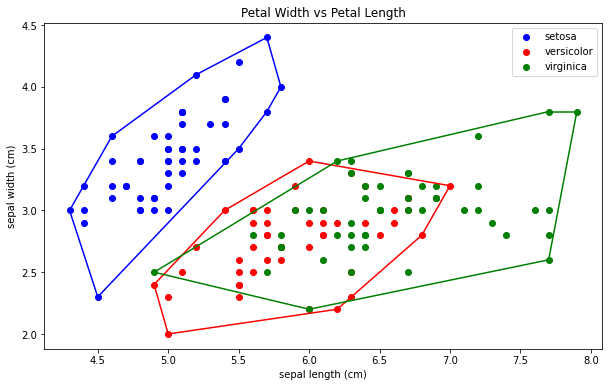

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for j in range(len(data.target_names)):
    bucket = df[df['Target'] == j]
    buckets = bucket.iloc[:,[0,1]].values
    plt.scatter(buckets[:,0], buckets[:,1], label = data.target_names[j], color = colors[j])
    hull = list(myConvexHull(buckets))
    for i in range(len(hull)-1):
        x = [buckets[hull[i]][0], buckets[hull[i+1]][0]]
        y = [buckets[hull[i]][1], buckets[hull[i+1]][1]]
        plt.plot(x, y, colors[j])
plt.legend()

# Brute Force

In [9]:
def orientation(p, q, r, bucket):
    val = (bucket[q][1] - bucket[p][1]) * (bucket[r][0]- bucket[q][0]) - (bucket[q][0] - bucket[p][0]) * (bucket[r][1] - bucket[q][1])
    
    # colinear
    if val == 0:
        return 0
    
    # clockwise
    elif val > 0:
        return 1
    
    # counterclockwise
    else:
        return 2

def bruteConvexHull(bucket):
    bucket[0]

    leftmost = 0
    for i in range(1, len(bucket)):
        if bucket[i][0] < bucket[leftmost][0]:
            leftmost = i

    hull = [] 
    p = leftmost
    q = 0

    while(True):
        hull.append(p)

        q = (p + 1) % len(bucket)

        for i in range(len(bucket)):
            if orientation(p,i,q,bucket) == 1:
                q = i

        p = q
        if p == leftmost:
            break
    
    return hull


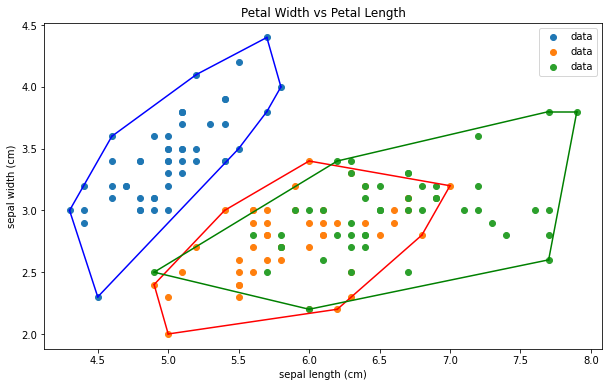

In [10]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for j in range(len(data.target_names)):
    bucket = df[df['Target'] == j]
    buckets = bucket.iloc[:,[0,1]].values
    hull = bruteConvexHull(buckets)
    plt.scatter([p[0] for p in buckets], [p[1] for p in buckets], label="data")
    for i in range(len(hull)-1):
        x = [buckets[hull[i]][0], buckets[hull[i+1]][0]]
        y = [buckets[hull[i]][1], buckets[hull[i+1]][1]]
        plt.plot(x, y, colors[j])
    x = [buckets[hull[0]][0], buckets[hull[-1]][0]]
    y = [buckets[hull[0]][1], buckets[hull[-1]][1]]
    plt.plot(x, y, colors[j])
plt.legend()